In [7]:
import os
import numpy as np
from scipy.signal import stft
import matplotlib.pyplot as plt

# Define paths
data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epochs'
output_dir = '/home/jovyan/BCICIV_2a_gdf/stft_resultvolnew'

# Get the class labels from the directory structure
class_folders = sorted([folder for folder in os.listdir(data_dir) if folder.startswith('class_')])

# Sampling frequency
fs = 250  # Sampling frequency

# Iterate through each class subfolder
for class_folder in class_folders:
    class_dir = os.path.join(data_dir, class_folder)
    stft_class_dir = os.path.join(output_dir, class_folder)
    
    # Create output directory for the current class if it doesn't exist
    os.makedirs(stft_class_dir, exist_ok=True)
    
    # Get a list of files in the class directory
    files = [f for f in os.listdir(class_dir) if f.endswith('.npy')]
    
    # Plot the STFT for each file
    for file_name in files:
        # Load EEG data
        file_path = os.path.join(class_dir, file_name)
        eeg_data = np.load(file_path)  # Shape: (22, 1126)
        
        # We will compute the STFT for each channel and average the results
        stft_results = []
        for channel_data in eeg_data:
            f, t, Zxx = stft(channel_data, fs=fs, nperseg=128)  # Adjust parameters as needed
            stft_results.append(np.abs(Zxx))
        
        # Convert list of arrays to a single matrix and average over channels
        stft_results = np.array(stft_results)  # Shape: (22, freq_bins, time_points)
        avg_stft = np.mean(stft_results, axis=0)  # Shape: (freq_bins, time_points)
        
        # Plot the STFT
        plt.figure(figsize=(10, 6))
        plt.pcolormesh(t, f, avg_stft, shading='gouraud')
        plt.colorbar(label='Magnitude')
        plt.title(f'STFT for {class_folder}: {file_name}')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        
        # Save the plot
        plot_path = os.path.join(stft_class_dir, file_name.replace('.npy', '_stft.png'))
        plt.savefig(plot_path)
        plt.close()


In [24]:
import os
import numpy as np
from scipy.signal import stft
import matplotlib.pyplot as plt

# Define paths
data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epochs'
output_dir = '/home/jovyan/BCICIV_2a_gdf/stft_resultvolnew'

# Get the class labels from the directory structure
class_folders = sorted([folder for folder in os.listdir(data_dir) if folder.startswith('class_')])

# Sampling frequency
fs = 250  # Sampling frequency

# Iterate through each class subfolder
for class_folder in class_folders:
    class_dir = os.path.join(data_dir, class_folder)
    stft_class_dir = os.path.join(output_dir, class_folder)
    
    # Create output directory for the current class if it doesn't exist
    os.makedirs(stft_class_dir, exist_ok=True)
    
    # Get a list of files in the class directory
    files = [f for f in os.listdir(class_dir) if f.endswith('.npy')]
    
    # Plot the STFT for each file
    for file_name in files:
        # Load EEG data
        file_path = os.path.join(class_dir, file_name)
        eeg_data = np.load(file_path)  # Shape: (22, 1126)
        
        # We will compute the STFT for each channel and average the results
        stft_results = []
        for channel_data in eeg_data:
            f, t, Zxx = stft(channel_data, fs=fs, nperseg=128)  # Adjust parameters as needed
            stft_results.append(np.abs(Zxx))
        
        # Convert list of arrays to a single matrix and average over channels
        stft_results = np.array(stft_results)  # Shape: (22, freq_bins, time_points)
        avg_stft = np.mean(stft_results, axis=0)  # Shape: (freq_bins, time_points)
        
        # Plot the STFT
        plt.figure(figsize=(10, 6))
        plt.pcolormesh(t, f, avg_stft, shading='gouraud')
        
        # Remove axis labels, ticks, and colorbar
        plt.axis('off')
        
        # Save the plot without any labels or color bars
        plot_path = os.path.join(stft_class_dir, file_name.replace('.npy', '_stft.png'))
        plt.savefig(plot_path, bbox_inches='tight', pad_inches=0)
        plt.close()

print('STFT plots saved successfully.')


STFT plots saved successfully.


In [2]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
data_dir = '/home/jovyan/BCICIV_2a_gdf/stft_resultvolnew'
output_dir = '/home/jovyan/BCICIV_2a_gdf/stft_classification'

# Create directories for training and validation data
train_dir = os.path.join(output_dir, 'train')
validation_dir = os.path.join(output_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Define class folders
class_folders = sorted([folder for folder in os.listdir(data_dir) if folder.startswith('class_')])

# Split data into training and validation sets
for class_folder in class_folders:
    class_dir = os.path.join(data_dir, class_folder)
    stft_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith('.png')]
    
    train_files, val_files = train_test_split(stft_files, test_size=0.2, random_state=42)
    
    # Create class-specific directories in train and validation folders
    train_class_dir = os.path.join(train_dir, class_folder)
    val_class_dir = os.path.join(validation_dir, class_folder)
    
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    
    # Move files to respective directories
    for file_path in train_files:
        shutil.copy(file_path, train_class_dir)
        
    for file_path in val_files:
        shutil.copy(file_path, val_class_dir)

print('Data organized successfully.')


Data organized successfully.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Generator for loading images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator
)

# Save the trained model
model.save('/home/jovyan/BCICIV_2a_gdf/stft_cnn_model.h5')


In [30]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

# Load a new STFT image for prediction
from tensorflow.keras.preprocessing import image
import numpy as np

# Example image path
img_path = '/home/jovyan/BCICIV_2a_gdf/stft_resultvolnew/class_0/sub9_epoch_92_stft.png'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction[0])
print(f'Predicted class: {predicted_class}')


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - accuracy: 0.2518 - loss: 1.3863
Validation accuracy: 25.05%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted class: 3


In [5]:
import mne
import numpy as np
import os

# Define the path to the dataset and the output directory
gdf_path = '/home/jovyan/BCICIV_2a_gdf/A02T.gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub2'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Step 1: Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)

# Remove the last three channels (EOG-left, EOG-central, and EOG-right)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Step 2: Extract epochs for each class using provided event IDs
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s

# Creating epochs for each class
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True)
data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)

# Standardize each channel
data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

# Step 3: Save each epoch as a matrix of shape (22, 1125)
for i, epoch_data in enumerate(data):
    # Adjust labels to start from 0 by subtracting 7 from each label
    label = epochs.events[i, -1] - 7
    file_path = os.path.join(output_dir, f'epoch_{i+1}_class_{label}.npy')
    np.save(file_path, epoch_data)

print(f'Saved {len(data)} epochs to {output_dir}')


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs to /home/jovyan/BCICIV_2a_gdf/processed_epoch_sub2


/tmp/ipykernel_1142409/3003767679.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path to the directory containing the matrix files
data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub2'

# Initialize lists to store data and labels
data = []
labels = []

# Iterate through each file in the directory
for file in os.listdir(data_dir):
    if file.endswith('.npy'):
        # Extract the class label from the file name
        class_label = int(file.split('_')[-1].split('.')[0])
        # Load matrix data
        matrix_data = np.load(os.path.join(data_dir, file))
        # Append data and labels
        data.append(matrix_data)
        labels.append(class_label)

# Convert lists to arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the data arrays
print("Shape of data array:", X_train.shape)
print("Shape of labels array:", y_train.shape)


Shape of data array: (229, 22, 1126)
Shape of labels array: (229,)


Total number of files: 287
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.3042 - loss: 3.8369 - val_accuracy: 0.2931 - val_loss: 3.4493 - learning_rate: 0.0010
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3447 - loss: 3.5428 - val_accuracy: 0.2586 - val_loss: 3.4957 - learning_rate: 0.0010
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4190 - loss: 3.4438 - val_accuracy: 0.2931 - val_loss: 3.4721 - learning_rate: 0.0010
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4915 - loss: 3.2922 - val_accuracy: 0.3276 - val_loss: 3.4272 - learning_rate: 0.0010
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4818 - loss: 3.2136 - val_accuracy: 0.3103 - val_loss: 3.3833 - learning_rate: 0.0010
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6017 - loss: 2.9420 - val_accuracy: 0.3103 - val_loss: 3.3412 - learning_rate: 0.0010
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6566 - loss: 2.

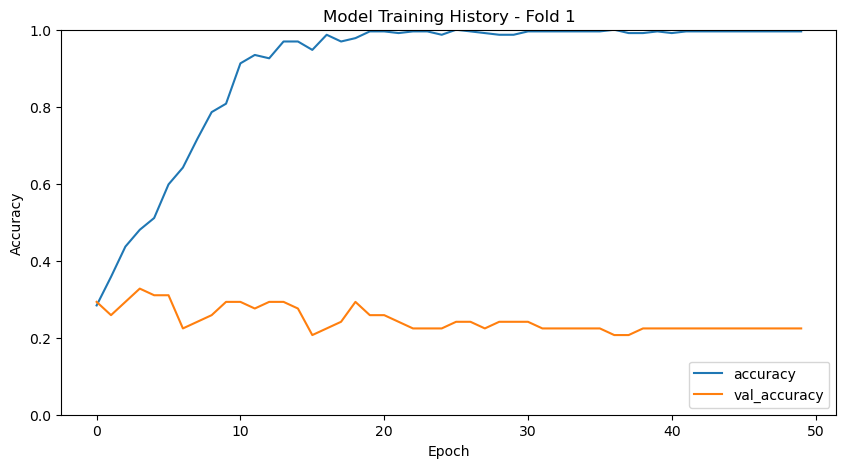

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.2773 - loss: 3.8832 - val_accuracy: 0.1724 - val_loss: 3.4593 - learning_rate: 0.0010
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3406 - loss: 3.4912 - val_accuracy: 0.1724 - val_loss: 3.4784 - learning_rate: 0.0010
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4201 - loss: 3.4605 - val_accuracy: 0.2069 - val_loss: 3.4590 - learning_rate: 0.0010
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4165 - loss: 3.3308 - val_accuracy: 0.2069 - val_loss: 3.4227 - learning_rate: 0.0010
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4384 - loss: 3.2516 - val_accuracy: 0.2069 - val_loss: 3.3734 - learning_rate: 0.0010
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4940 - loss: 3.1322 - val_accuracy: 0.2414 - val_loss: 3.3250 - learning_rate: 0.0010
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5307 - loss: 2.9620 - val_accuracy: 0.2586

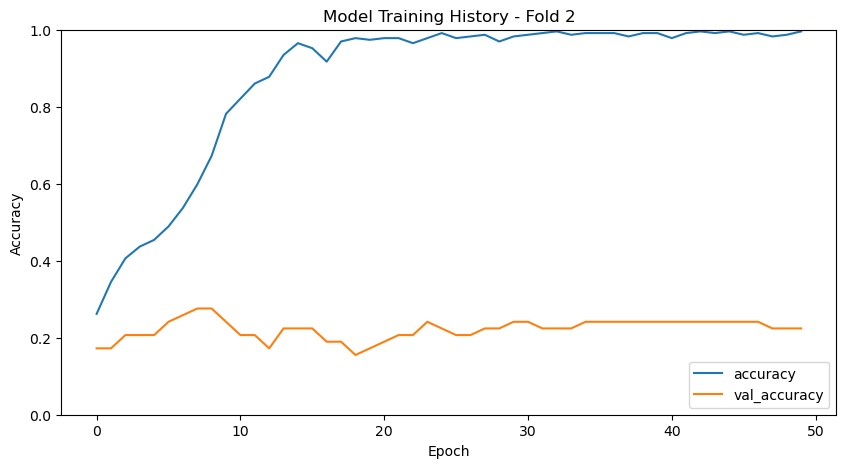

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.2350 - loss: 4.2086 - val_accuracy: 0.2982 - val_loss: 3.4934 - learning_rate: 0.0010
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3277 - loss: 3.5136 - val_accuracy: 0.2456 - val_loss: 3.5199 - learning_rate: 0.0010
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4691 - loss: 3.4511 - val_accuracy: 0.2632 - val_loss: 3.5002 - learning_rate: 0.0010
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4730 - loss: 3.2842 - val_accuracy: 0.3158 - val_loss: 3.4644 - learning_rate: 0.0010
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5465 - loss: 3.1000 - val_accuracy: 0.2281 - val_loss: 3.4217 - learning_rate: 0.0010
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5808 - loss: 2.9409 - val_accuracy: 0.2807 - val_loss: 3.3743 - learning_rate: 0.0010
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7048 - loss: 2.7416 - val_accuracy: 0.2632

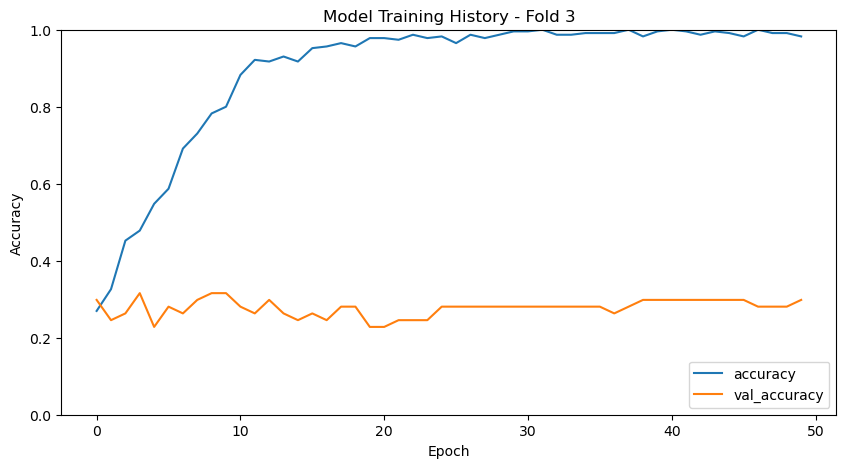

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.2281 - loss: 4.0716 - val_accuracy: 0.1754 - val_loss: 3.4675 - learning_rate: 0.0010
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3740 - loss: 3.4386 - val_accuracy: 0.1754 - val_loss: 3.4956 - learning_rate: 0.0010
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4004 - loss: 3.3989 - val_accuracy: 0.2281 - val_loss: 3.4954 - learning_rate: 0.0010
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4564 - loss: 3.3073 - val_accuracy: 0.2807 - val_loss: 3.4505 - learning_rate: 0.0010
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4407 - loss: 3.1675 - val_accuracy: 0.2632 - val_loss: 3.3909 - learning_rate: 0.0010
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6060 - loss: 2.9715 - val_accuracy: 0.2456 - val_loss: 3.3422 - learning_rate: 0.0010
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6039 - loss: 2.8621 - val_accuracy: 0.2982

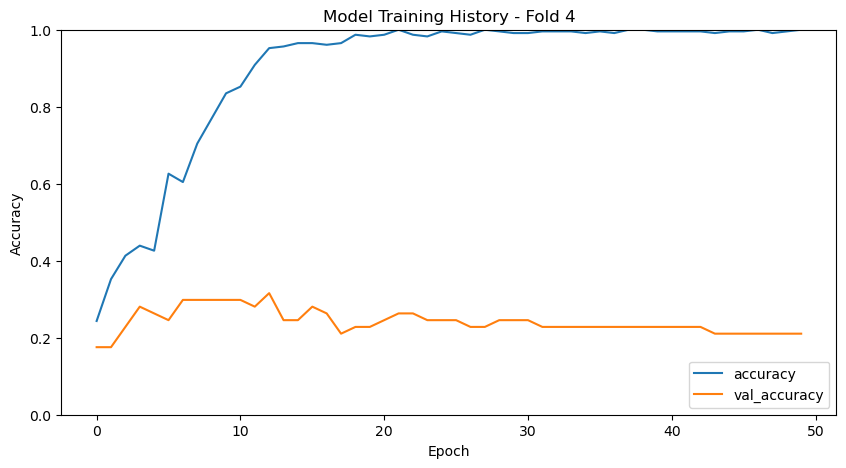

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.2520 - loss: 3.8725 - val_accuracy: 0.1754 - val_loss: 3.4443 - learning_rate: 0.0010
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3339 - loss: 3.5348 - val_accuracy: 0.2807 - val_loss: 3.4657 - learning_rate: 0.0010
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4365 - loss: 3.4036 - val_accuracy: 0.2982 - val_loss: 3.4528 - learning_rate: 0.0010
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4853 - loss: 3.2817 - val_accuracy: 0.2632 - val_loss: 3.4182 - learning_rate: 0.0010
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5392 - loss: 3.1295 - val_accuracy: 0.2456 - val_loss: 3.3667 - learning_rate: 0.0010
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5710 - loss: 2.9653 - val_accuracy: 0.2632 - val_loss: 3.3044 - learning_rate: 0.0010
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6517 - loss: 2.7927 - val_accuracy: 0.2982

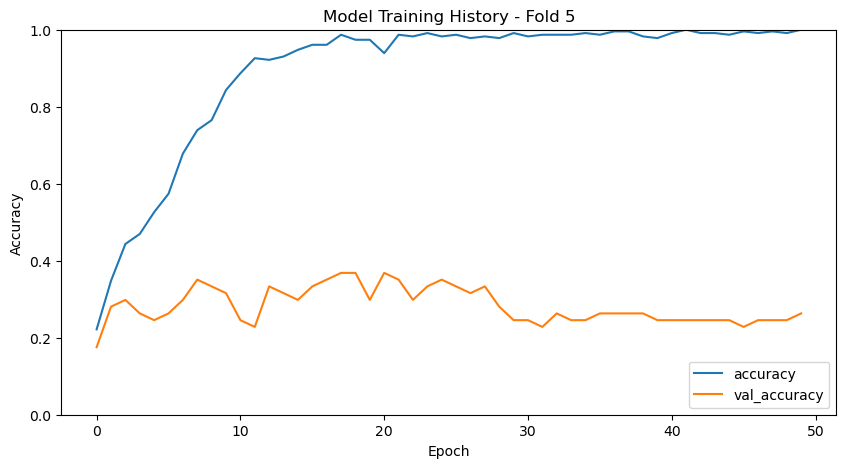

In [99]:
import os
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the path to the directory containing the matrix files
data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoc_sub1'

# Initialize lists to store data and labels
data = []
labels = []

# Iterate through each file in the directory
for file in os.listdir(data_dir):
    if file.endswith('.npy'):
        # Extract the class label from the file name
        class_label = int(file.split('_')[-1].split('.')[0])
        # Load matrix data
        matrix_data = np.load(os.path.join(data_dir, file))
        # Append data and labels
        data.append(matrix_data)
        labels.append(class_label)

# Convert lists to arrays
data = np.array(data)
labels = np.array(labels)

# Standardize data
data = (data - np.mean(data, axis=(0, 2), keepdims=True)) / np.std(data, axis=(0, 2), keepdims=True)

# Print total number of files
total_files = len(data)
print("Total number of files:", total_files)

# Define hyperparameters
KE = 32
pe = 0.3
F1 = 24
L = 2
KT = 4
FT = 12
D = 2
pt = 0.3

def create_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGnet-like part
    # Temporal Convolution Layer
    x = layers.Conv1D(filters=F1, kernel_size=KE, activation='elu', padding='same', kernel_initializer=tf.keras.initializers.glorot_uniform(), kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
    x = layers.BatchNormalization()(x)

    # Depth-wise Convolution
    x = layers.DepthwiseConv1D(kernel_size=1, depth_multiplier=D, activation='elu', padding='valid', depthwise_initializer=tf.keras.initializers.glorot_uniform(), depthwise_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)

    # Separable Convolution
    x = layers.SeparableConv1D(filters=F1, kernel_size=16, activation='elu', padding='same', depthwise_initializer=tf.keras.initializers.glorot_uniform(), depthwise_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)

    # Average Pooling
    x = layers.AveragePooling1D(pool_size=8, padding='same')(x)
    x = layers.Dropout(pe)(x)

    # TCN part
    for _ in range(L):
        residual = x
        for rate in (1, 2, 4):
            dilated_conv = layers.Conv1D(filters=FT, kernel_size=KT, padding='causal', dilation_rate=rate, kernel_initializer=tf.keras.initializers.glorot_uniform(), kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
            bn = layers.BatchNormalization()(dilated_conv)
            elu = layers.Activation('elu')(bn)
            dropout = layers.Dropout(pt)(elu)
        # 1x1 Convolution to ensure the addition has the same depth shapes
        residual_conv = layers.Conv1D(filters=FT, kernel_size=1, kernel_initializer=tf.keras.initializers.glorot_uniform(), kernel_regularizer=tf.keras.regularizers.l2(0.01))(residual)
        # Adding the residual connection
        x = layers.Add()([dropout, residual_conv])

    # Concatenation
    x = layers.Concatenate(axis=2)([dropout, x])

    # Flatten and Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='elu', kernel_initializer=tf.keras.initializers.glorot_uniform(), kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Assuming input_shape is correctly defined as (num_channels, num_time_samples)
input_shape = (data.shape[1], data.shape[2])

# Train the model with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
histories = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(data, labels)):
    X_train_fold, X_val_fold = data[train_idx], data[val_idx]
    y_train_fold, y_val_fold = labels[train_idx], labels[val_idx]

    # Create and compile the model for this fold
    model = create_model(input_shape, num_classes)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Learning rate scheduler
    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr * np.exp(-0.1)

    callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[callback])
    histories.append(history)

    # Plot training history for this fold
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'Model Training History - Fold {fold+1}')
    plt.show()


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs to /home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5


/tmp/ipykernel_3148700/2397589928.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


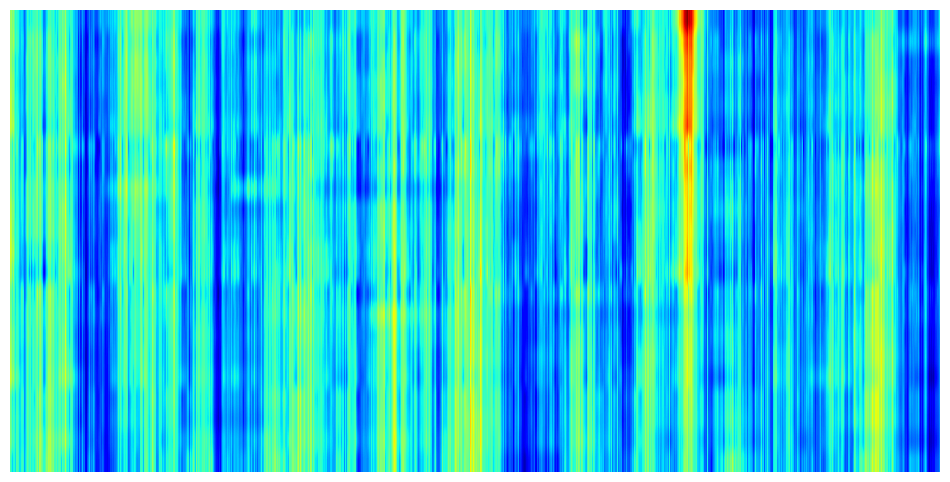

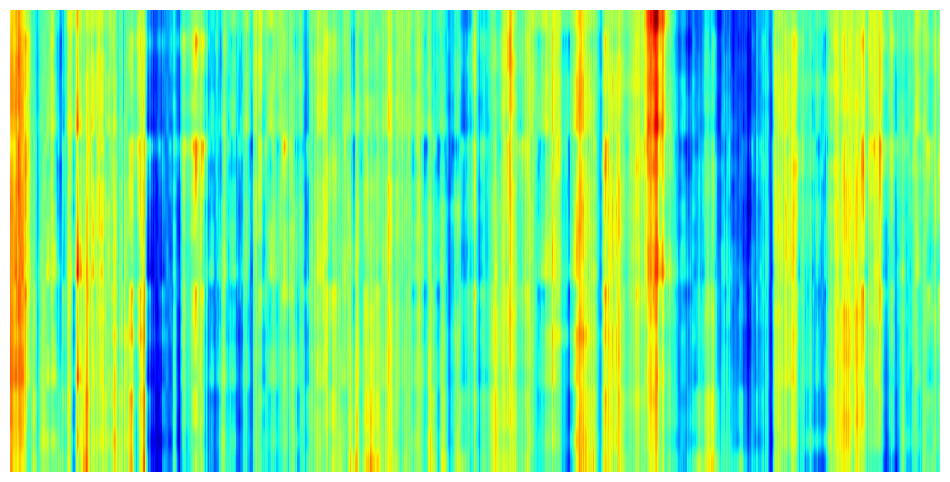

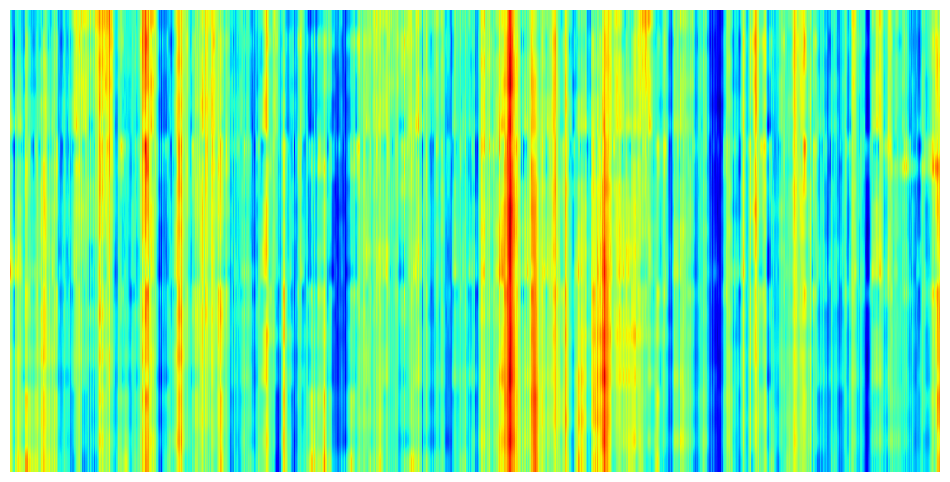

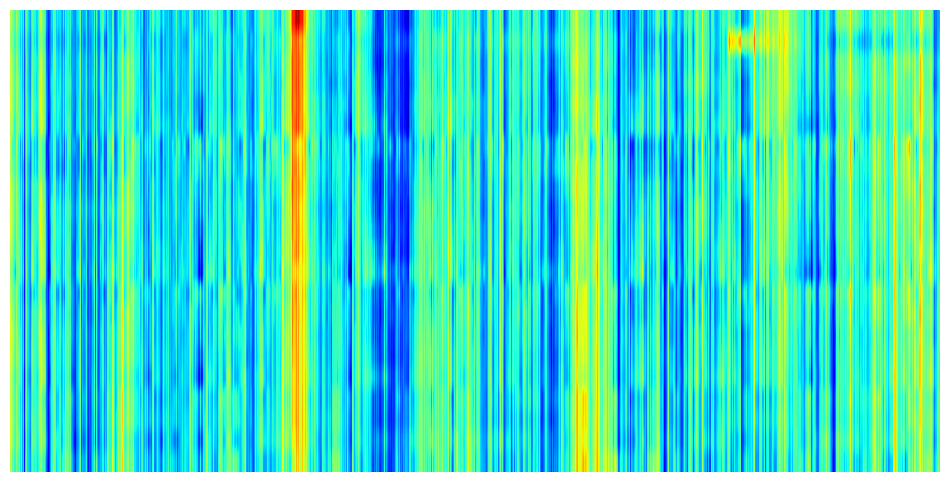

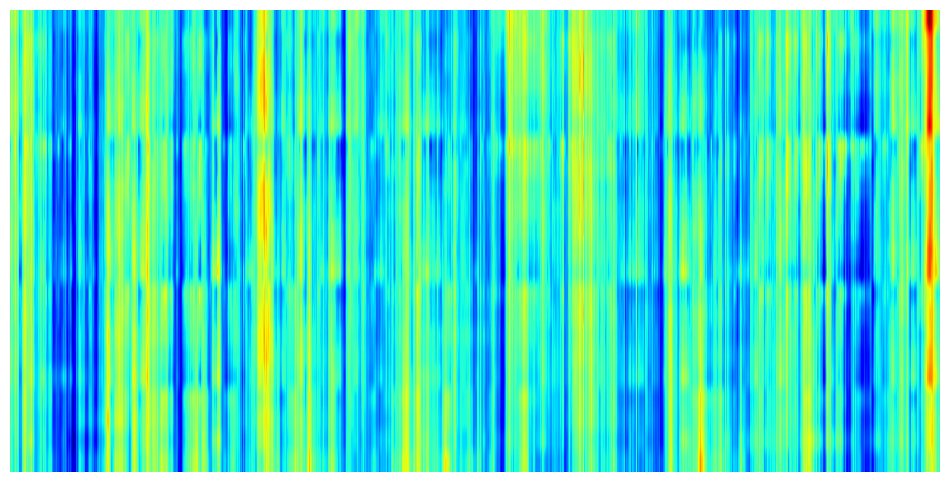

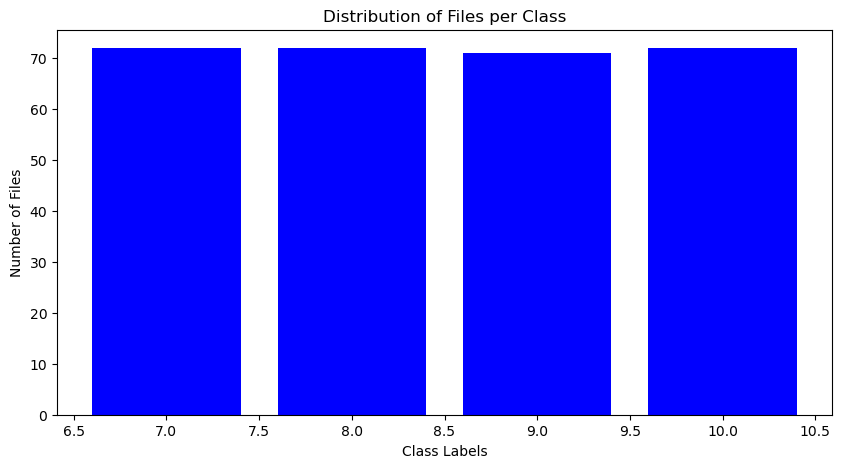

Saved epoch plots:
/home/jovyan/BCICIV_2a_gdf/epoch_plots/epoch_1_class_0.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/epoch_plots/epoch_62_class_3.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/epoch_plots/epoch_72_class_2.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/epoch_plots/epoch_196_class_2.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/epoch_plots/epoch_145_class_1.npy_without_axes.png
Class distribution plot saved at: /home/jovyan/BCICIV_2a_gdf/epoch_plots/class_distribution.png


In [18]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the path to the dataset and the output directory
gdf_path = '/home/jovyan/BCICIV_2a_gdf/A05T.gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Step 1: Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)

# Remove the last three channels (EOG-left, EOG-central, and EOG-right)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Step 2: Extract epochs for each class using provided event IDs
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s

# Creating epochs for each class
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True)
data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)

# Standardize each channel
data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

# Step 3: Save each epoch as a matrix of shape (22, 1125)
class_counts = {7: 0, 8: 0, 9: 0, 10: 0}

for i, epoch_data in enumerate(data):
    # Adjust labels to start from 0 by subtracting 7 from each label
    label = epochs.events[i, -1]
    file_path = os.path.join(output_dir, f'epoch_{i+1}_class_{label - 7}.npy')
    np.save(file_path, epoch_data)
    class_counts[label] += 1

print(f'Saved {len(data)} epochs to {output_dir}')

# Step 4: Plot some saved epochs and save images
def plot_and_save_epochs(output_dir, save_dir, num_files_to_plot=5):
    os.makedirs(save_dir, exist_ok=True)
    saved_files = [f for f in os.listdir(output_dir) if f.endswith('.npy')]
    saved_file_paths = []
    for i in range(min(num_files_to_plot, len(saved_files))):
        file_path = os.path.join(output_dir, saved_files[i])
        epoch_data = np.load(file_path)
        
        
        
        # Plot without axes
        plt.figure(figsize=(12, 6))
        plt.imshow(epoch_data, aspect='auto', cmap='jet')
        plt.axis('off')
        save_path_without_axes = os.path.join(save_dir, f'{saved_files[i]}_without_axes.png')
        plt.savefig(save_path_without_axes)
        plt.show()  # Display the plot
        plt.close()
        saved_file_paths.append(save_path_without_axes)
    
    return saved_file_paths

# Step 5: Plot the distribution of files per class and save image
def plot_and_save_class_distribution(class_counts, save_path):
    labels = list(class_counts.keys())
    counts = list(class_counts.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color='blue')
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Files')
    plt.title('Distribution of Files per Class')
    plt.savefig(save_path)
    plt.show()  # Display the plot
    plt.close()
    return save_path

# Directory to save plots
plot_save_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_plots'
os.makedirs(plot_save_dir, exist_ok=True)

# Plot and save example epochs
saved_epoch_files = plot_and_save_epochs(output_dir, plot_save_dir)

# Save the distribution of files per class
class_distribution_path = plot_and_save_class_distribution(class_counts, os.path.join(plot_save_dir, 'class_distribution.png'))

# Print the paths to the saved files
print("Saved epoch plots:")
for file_path in saved_epoch_files:
    print(file_path)

print(f"Class distribution plot saved at: {class_distribution_path}")


In [34]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the path to the dataset and the output directory
gdf_path = '/home/jovyan/BCICIV_2a_gdf/A02E.gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub2Test'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Step 1: Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)

# Remove the last three channels (EOG-left, EOG-central, and EOG-right)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Step 2: Extract epochs for each class using provided event IDs
event_id = {'783': 7, '784': 8, '785': 9, '786': 10}
try:
    events, _ = mne.events_from_annotations(raw, event_id=event_id)
except ValueError as ve:
    print(f"Error extracting events: {ve}")
    events = []

if len(events) == 0:
    print("No valid events found. Please check your annotations or event IDs.")
    exit()

tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s

# Creating epochs for each class
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True, on_missing='warn')
data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)

# Standardize each channel
data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

# Step 3: Save each epoch as a matrix of shape (22, 1125)
class_counts = {7: 0, 8: 0, 9: 0, 10: 0}

for i, epoch_data in enumerate(data):
    # Adjust labels to start from 0 by subtracting 7 from each label
    label = epochs.events[i, -1]
    file_path = os.path.join(output_dir, f'epoch_{i+1}_class_{label - 7}.npy')
    np.save(file_path, epoch_data)
    class_counts[label] += 1

print(f'Saved {len(data)} epochs to {output_dir}')

# Step 4: Plot and save some epochs without axes and color bar
def plot_and_save_epochs(output_dir, save_dir, num_files_to_plot=5):
    os.makedirs(save_dir, exist_ok=True)
    saved_files = [f for f in os.listdir(output_dir) if f.endswith('.npy')]
    saved_file_paths = []
    for i in range(min(num_files_to_plot, len(saved_files))):
        file_path = os.path.join(output_dir, saved_files[i])
        epoch_data = np.load(file_path)
        
        # Plot without axes and color bar
        plt.figure(figsize=(12, 6))
        plt.imshow(epoch_data, aspect='auto', cmap='jet')
        plt.axis('off')
        save_path = os.path.join(save_dir, f'{saved_files[i]}_without_axes.png')
        plt.savefig(save_path)
        plt.close()
        saved_file_paths.append(save_path)
    
    return saved_file_paths

# Step 5: Plot the distribution of files per class and save image
def plot_and_save_class_distribution(class_counts, save_path):
    labels = list(class_counts.keys())
    counts = list(class_counts.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color='blue')
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Files')
    plt.title('Distribution of Files per Class')
    plt.savefig(save_path)
    plt.close()
    return save_path

# Directory to save plots
plot_save_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5'
os.makedirs(plot_save_dir, exist_ok=True)

# Plot and save example epochs
saved_epoch_files = plot_and_save_epochs(output_dir, plot_save_dir)

# Save the distribution of files per class
class_distribution_path = plot_and_save_class_distribution(class_counts, os.path.join(plot_save_dir, 'class_distribution.png'))

# Print the paths to the saved files
print("Saved epoch plots:")
for file_path in saved_epoch_files:
    print(file_path)

print(f"Class distribution plot saved at: {class_distribution_path}")


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 662665  =      0.000 ...  2650.660 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['783']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_3148700/2907705109.py:34: RuntimeWarning: No matching events found for 784 (event id 8)
  epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True, on_missing='warn')
/tmp/ipykernel_3148700/2907705109.py:34: RuntimeWarning: No matching events found for 785 (event id 9)
  epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True, on_missing='warn')
/tmp/ipykernel_3148700/2907705109.py:34: RuntimeWarning: No matching events found for 786 (event id 10)
  epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True, on_missing='warn')
/tmp/ipykernel_3148700/2907705109.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs to /home/jovyan/BCICIV_2a_gdf/processed_epoch_sub2Test
Saved epoch plots:
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_1_class_0.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_126_class_0.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_263_class_0.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_265_class_0.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_142_class_0.npy_without_axes.png
Class distribution plot saved at: /home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/class_distribution.png


Total number of files: 287
Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.2687 - loss: 1.7220 - learning_rate: 1.0000e-04
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4692 - loss: 1.2823 - learning_rate: 1.0000e-04
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5465 - loss: 1.0117 - learning_rate: 1.0000e-04
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6528 - loss: 0.8500 - learning_rate: 1.0000e-04
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6881 - loss: 0.8046 - learning_rate: 1.0000e-04
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7445 - loss: 0.6569 - learning_rate: 1.0000e-04
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7392 - loss: 0.6849 - learning_rate: 1.0000e-04
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7988 - loss: 0.5896 - learning_rate: 1.0000e-04
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8569

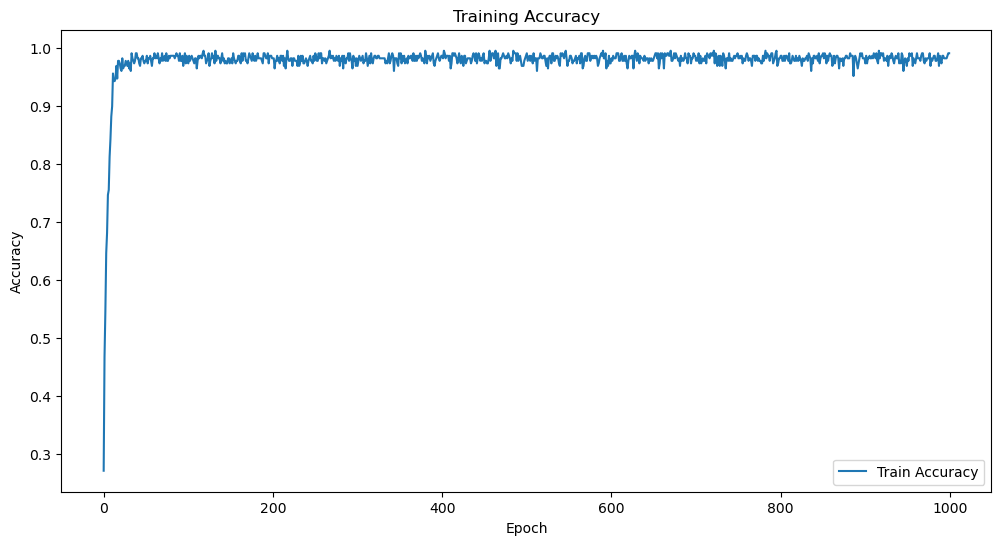

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step


<Figure size 800x600 with 0 Axes>

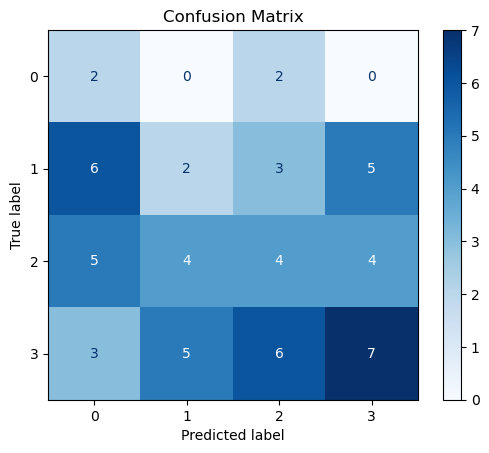

              precision    recall  f1-score   support

           0       0.12      0.50      0.20         4
           1       0.18      0.12      0.15        16
           2       0.27      0.24      0.25        17
           3       0.44      0.33      0.38        21

    accuracy                           0.26        58
   macro avg       0.25      0.30      0.24        58
weighted avg       0.30      0.26      0.26        58

Test Accuracy: 0.2586
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3322 - loss: 1.8344
New Test Accuracy: 0.3206


In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Define the path to the directory containing the matrix files
data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub2'

# Initialize lists to store data and labels
data = []
labels = []

# Iterate through each file in the directory
for file in os.listdir(data_dir):
    if file.endswith('.npy'):
        # Extract the class label from the file name
        class_label = int(file.split('_')[-1].split('.')[0])
        # Load matrix data
        matrix_data = np.load(os.path.join(data_dir, file))
        # Append data and labels
        data.append(matrix_data)
        labels.append(class_label)

# Convert lists to arrays
data = np.array(data)
labels = np.array(labels)

# Standardize data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Print total number of files
total_files = len(data)
print("Total number of files:", total_files)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define hyperparameters
KE = 32
pe = 0.3
F1 = 24
L = 2
KT = 4
FT = 12
D = 2
pt = 0.3

def create_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGnet-like part
    # Temporal Convolution Layer
    x = layers.Conv1D(filters=F1, kernel_size=KE, activation='elu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)

    # Depth-wise Convolution
    x = layers.DepthwiseConv1D(kernel_size=1, depth_multiplier=D, activation='elu', padding='valid')(x)
    x = layers.BatchNormalization()(x)

    # Separable Convolution
    x = layers.SeparableConv1D(filters=F1, kernel_size=16, activation='elu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Average Pooling
    x = layers.AveragePooling1D(pool_size=8, padding='same')(x)
    x = layers.Dropout(pe)(x)

    # TCN part
    for _ in range(L):
        residual = x
        for rate in (1, 2, 4):
            dilated_conv = layers.Conv1D(filters=FT, kernel_size=KT, padding='causal', dilation_rate=rate)(x)
            bn = layers.BatchNormalization()(dilated_conv)
            elu = layers.Activation('elu')(bn)
            dropout = layers.Dropout(pt)(elu)
        # 1x1 Convolution to ensure the addition has the same depth shapes
        residual_conv = layers.Conv1D(filters=FT, kernel_size=1)(residual)
        # Adding the residual connection
        x = layers.Add()([dropout, residual_conv])

    # Concatenation
    x = layers.Concatenate(axis=2)([dropout, x])

    # Flatten and Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='elu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Assuming input_shape is correctly defined as (num_channels, num_time_samples)
input_shape = (X_train.shape[1], X_train.shape[2])

# Create and compile the model
num_classes = len(np.unique(labels))
model = create_model(input_shape, num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * np.exp(-0.1))

# Model checkpoint to save the best model
checkpoint = ModelCheckpoint('best_model.keras', monitor='accuracy', save_best_only=True, mode='max')

callback = LearningRateScheduler(scheduler)

# Train the model without validation split
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, callbacks=[checkpoint, callback])

# Load the best model
model.load_weights('best_model.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.show()

# Predict the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels))
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test Accuracy: {accuracy:.4f}')

# Testing with new data (assuming new test data path)
test_data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub2Test'
test_data = []
test_labels = []

for file in os.listdir(test_data_dir):
    if file.endswith('.npy'):
        class_label = int(file.split('_')[-1].split('.')[0])
        matrix_data = np.load(os.path.join(test_data_dir, file))
        test_data.append(matrix_data)
        test_labels.append(class_label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Standardize new test data
test_data = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)

# Evaluate on new test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'New Test Accuracy: {test_accuracy:.4f}')


In [56]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the path to the dataset and the output directory
gdf_path = '/home/jovyan/BCICIV_2a_gdf/A01E.gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub2Test'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Step 1: Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)

# Remove the last three channels (EOG-left, EOG-central, and EOG-right)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Step 2: Extract events from annotations
annotations = raw.annotations
print("Annotations:", annotations)

# Extract events from annotations
events, event_id = mne.events_from_annotations(raw)
print("Event IDs:", event_id)

# Check which event IDs are present and their counts
unique_events, event_counts = np.unique(events[:, 2], return_counts=True)
print("Unique Events in the Dataset:", dict(zip(unique_events, event_counts)))

# Select event IDs for the specific classes you want to analyze
selected_event_ids = {str(key): value for key, value in event_id.items() if key in ['768', '783']}
print("Selected Event IDs:", selected_event_ids)

# Step 3: Check if selected_event_ids is not empty
if not selected_event_ids:
    raise ValueError("Selected event IDs are empty. Please check the event IDs in the dataset.")

# Step 4: Create epochs for each class using selected event IDs
tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s
epochs = mne.Epochs(raw, events, selected_event_ids, tmin, tmax, baseline=None, preload=True, on_missing='warn')
data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)

# Standardize each channel
data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

# Step 5: Save each epoch as a matrix of shape (22, 1125)
class_counts = {v: 0 for v in selected_event_ids.values()}

for i, epoch_data in enumerate(data):
    # Get the label from the epochs events
    label = epochs.events[i, -1]
    file_path = os.path.join(output_dir, f'epoch_{i+1}_class_{label}.npy')
    np.save(file_path, epoch_data)
    class_counts[label] += 1

print(f'Saved {len(data)} epochs to {output_dir}')

# Step 6: Plot and save some epochs without axes and color bar
def plot_and_save_epochs(output_dir, save_dir, num_files_to_plot=5):
    os.makedirs(save_dir, exist_ok=True)
    saved_files = [f for f in os.listdir(output_dir) if f.endswith('.npy')]
    saved_file_paths = []
    for i in range(min(num_files_to_plot, len(saved_files))):
        file_path = os.path.join(output_dir, saved_files[i])
        epoch_data = np.load(file_path)
        
        # Plot without axes and color bar
        plt.figure(figsize=(12, 6))
        plt.imshow(epoch_data, aspect='auto', cmap='jet')
        plt.axis('off')
        save_path = os.path.join(save_dir, f'{saved_files[i]}_without_axes.png')
        plt.savefig(save_path)
        plt.close()
        saved_file_paths.append(save_path)
    
    return saved_file_paths

# Step 7: Plot the distribution of files per class and save image
def plot_and_save_class_distribution(class_counts, save_path):
    labels = list(class_counts.keys())
    counts = list(class_counts.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color='blue')
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Files')
    plt.title('Distribution of Files per Class')
    plt.savefig(save_path)
    plt.close()
    return save_path

# Directory to save plots
plot_save_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5'
os.makedirs(plot_save_dir, exist_ok=True)

# Plot and save example epochs
saved_epoch_files = plot_and_save_epochs(output_dir, plot_save_dir)

# Save the distribution of files per class
class_distribution_path = plot_and_save_class_distribution(class_counts, os.path.join(plot_save_dir, 'class_distribution.png'))

# Print the paths to the saved files
print("Saved epoch plots:")
for file_path in saved_epoch_files:
    print(file_path)

print(f"Class distribution plot saved at: {class_distribution_path}")


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686999  =      0.000 ...  2747.996 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Annotations: <Annotations | 595 segments: 1023 (7), 1072 (1), 276 (1), 277 (1), 32766 ...>
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Event IDs: {'1023': 1, '1072': 2, '276': 3, '277': 4, '32766': 5, '768': 6, '783': 7}
Unique Events in the Dataset: {1: 7, 2: 1, 3: 1, 4: 1, 5: 9, 6: 288, 7: 288}
Selected Event IDs: {'768': 6, '783': 7}
Not setting metadata
576 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 576 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_3148700/1825521997.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 575 epochs to /home/jovyan/BCICIV_2a_gdf/processed_epoch_sub2Test
Saved epoch plots:
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_312_class_7.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_267_class_6.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_246_class_7.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_411_class_6.npy_without_axes.png
/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/epoch_241_class_6.npy_without_axes.png
Class distribution plot saved at: /home/jovyan/BCICIV_2a_gdf/processed_epoch_sub5/class_distribution.png


In [69]:
import mne
import numpy as np
import os

# Define the path to the dataset and the output directory
gdf_path = '/home/jovyan/BCICIV_2a_gdf/A02E.gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epochstest2'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Step 1: Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)

# Remove the last three channels (EOG-left, EOG-central, and EOG-right)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Step 2: Extract events from annotations
events, event_id = mne.events_from_annotations(raw)

# Print the event_id dictionary to see available event IDs
print("Available event IDs:", event_id)

# Define the event ID we are interested in (update based on the available event IDs)
# selected_event_id = 768  # Update this to a valid event ID from the printed dictionary
selected_event_id = '768'  # Ensure it matches the format in event_id

# Step 3: Create epochs for the selected event ID
tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s
epochs = mne.Epochs(raw, events, event_id[selected_event_id], tmin, tmax, baseline=None, preload=True, on_missing='warn')
data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)

# Standardize each channel
data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

# Step 4: Save each epoch as a matrix of shape (22, 1125)
for i, epoch_data in enumerate(data):
    file_path = os.path.join(output_dir, f'epoch_{i+1}.npy')
    np.save(file_path, epoch_data)

print(f'Saved {len(data)} epochs for event ID {selected_event_id} to {output_dir}')


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 662665  =      0.000 ...  2650.660 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Available event IDs: {'1023': 1, '1072': 2, '276': 3, '277': 4, '32766': 5, '768': 6, '783': 7}
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
Saved 288 epochs for event ID 768 to /home/jovyan/BCICIV_2a_gdf/processed_epochstest2


/tmp/ipykernel_3148700/623765512.py:31: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


In [80]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define the directory containing the .npy files
data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epochstest2'

# Define the path to your trained model
model_path = '/home/jovyan/BCICIV_2a_gdf/best_model.keras'  # Update with the correct path to your model

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The directory {data_dir} does not exist.")

# List all .npy files in the directory
npy_files = [f for f in os.listdir(data_dir) if f.endswith('.npy')]

# Check if there are any .npy files in the directory
if len(npy_files) == 0:
    raise FileNotFoundError(f"No .npy files found in the directory {data_dir}.")

# Load the data from the .npy files
test_data = []
for file in npy_files:
    file_path = os.path.join(data_dir, file)
    epoch_data = np.load(file_path)
    test_data.append(epoch_data)

# Convert the list of numpy arrays to a single numpy array
test_data = np.array(test_data)

# Ensure the data is in the correct shape for the model
print("Shape of test data before any reshaping:", test_data.shape)

# If necessary, you might need to reshape or transpose your data to match the model's input shape
# For example, if the model expects shape (n_samples, n_times, n_channels)
# test_data = test_data.transpose((0, 2, 1))

# Normalize the data if required by your model
test_data = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)

# Check if the model file exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"The model file {model_path} does not exist.")

# Load your trained model
model = load_model(model_path)

# Predict classes for the test data
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted classes
print("Predicted classes for the new test data:", predicted_classes)


Shape of test data before any reshaping: (288, 22, 1126)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted classes for the new test data: [0 0 1 0 1 2 2 0 1 2 0 0 0 2 3 0 2 1 2 0 3 2 2 0 0 3 0 0 2 0 2 2 2 1 3 0 1
 0 0 0 3 2 2 3 3 0 1 3 3 0 1 0 2 0 3 3 1 3 1 3 0 2 2 2 2 1 3 3 1 1 0 0 1 2
 0 2 3 3 2 1 0 2 0 2 2 2 3 1 1 3 2 2 1 3 3 0 2 1 2 3 1 3 1 1 3 2 1 2 0 2 2
 0 2 3 1 0 0 1 1 1 0 2 2 1 3 3 1 0 3 0 3 3 0 0 2 0 2 1 3 0 2 3 0 1 2 0 0 3
 3 2 0 0 0 3 3 2 3 0 1 2 1 0 3 3 0 0 0 2 3 0 1 2 0 3 3 1 0 2 3 3 0 3 2 0 1
 0 3 2 3 2 0 2 0 3 2 3 1 1 3 1 1 1 3 1 3 1 0 3 0 2 1 1 3 0 3 1 2 0 1 0 0 2
 3 2 3 0 2 2 3 0 0 1 3 2 0 2 2 1 1 1 3 0 2 1 0 3 1 1 0 1 0 1 0 0 2 1 2 2 0
 1 2 2 3 3 1 3 1 0 0 1 0 1 2 1 1 3 3 2 1 0 1 0 1 2 2 1 1 0]


Shape of test data before any reshaping: (288, 22, 1126)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted classes for the new test data: [0 0 1 0 3 2 2 0 1 2 2 0 1 0 3 0 3 2 1 0 1 2 2 0 0 3 0 0 3 0 2 1 2 1 2 0 3
 0 0 0 0 0 2 3 2 0 1 1 3 1 1 0 2 0 3 0 2 3 2 3 0 2 2 2 0 1 0 1 1 1 0 3 1 1
 2 2 3 2 1 3 0 2 2 3 3 3 1 1 0 3 2 3 1 1 1 0 2 0 1 3 2 3 2 1 0 0 0 2 0 2 3
 2 2 1 1 0 0 3 1 0 1 2 2 3 3 3 3 0 0 0 3 3 1 0 1 3 2 1 3 0 2 3 3 2 2 1 0 3
 3 3 0 2 0 2 3 2 1 0 0 1 1 3 0 0 0 0 0 2 3 1 3 1 3 3 3 1 3 1 3 3 2 1 3 2 2
 0 3 3 0 2 3 0 0 2 0 1 2 1 2 1 3 0 0 2 3 3 1 0 2 2 1 3 3 0 2 1 1 0 1 0 0 2
 0 2 1 0 2 2 3 0 0 1 3 2 1 1 0 1 1 1 3 1 2 0 1 1 2 2 2 0 0 1 0 0 2 1 2 2 2
 3 2 1 0 3 2 3 1 0 3 1 1 1 2 2 1 3 3 2 1 0 3 0 2 2 2 3 2 3]


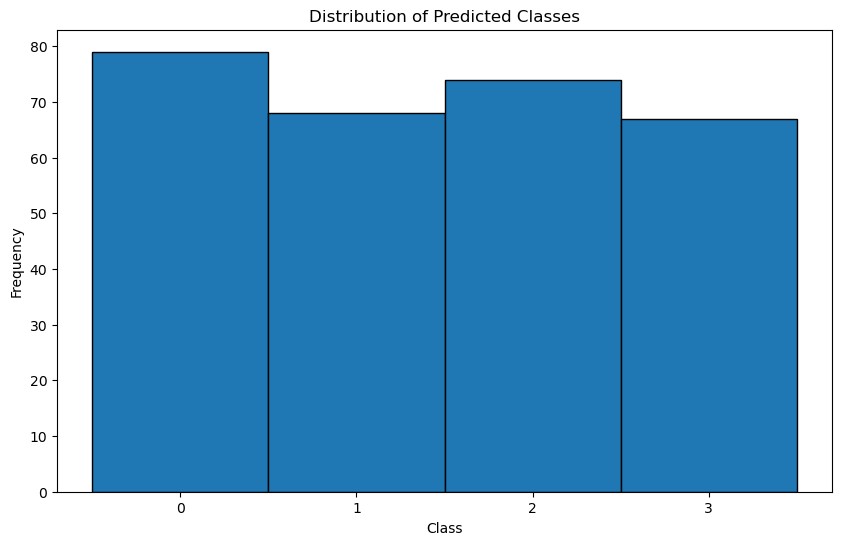

In [10]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the directory containing the .npy files
data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epochstest2'
model_path = '/home/jovyan/BCICIV_2a_gdf/best_model.keras'  # Update with the correct path to your model

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The directory {data_dir} does not exist.")

# List all .npy files in the directory
npy_files = [f for f in os.listdir(data_dir) if f.endswith('.npy')]

# Check if there are any .npy files in the directory
if len(npy_files) == 0:
    raise FileNotFoundError(f"No .npy files found in the directory {data_dir}.")

# Load the data from the .npy files
test_data = []
for file in npy_files:
    file_path = os.path.join(data_dir, file)
    epoch_data = np.load(file_path)
    test_data.append(epoch_data)

# Convert the list of numpy arrays to a single numpy array
test_data = np.array(test_data)

# Ensure the data is in the correct shape for the model
print("Shape of test data before any reshaping:", test_data.shape)

# Normalize the data if required by your model
test_data = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)

# Check if the model file exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"The model file {model_path} does not exist.")

# Load your trained model
model = load_model(model_path)

# Predict classes for the test data
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted classes
print("Predicted classes for the new test data:", predicted_classes)

# Visualize the distribution of predicted classes
plt.figure(figsize=(10, 6))
plt.hist(predicted_classes, bins=np.arange(5) - 0.5, edgecolor='black', align='mid')
plt.xticks(range(4))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Classes')
plt.show()


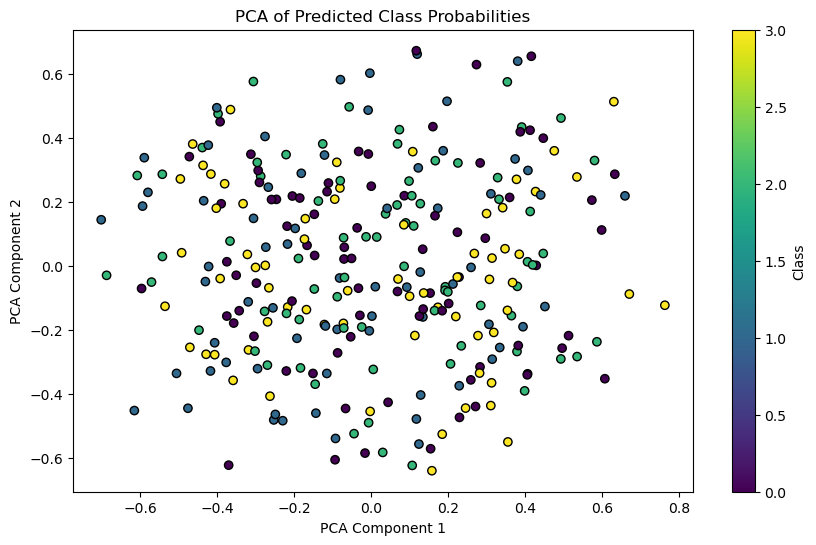

In [12]:
from sklearn.decomposition import PCA

# Assuming 'predictions' is the array of predicted probabilities
# For illustration, let's create dummy predictions with random probabilities
np.random.seed(0)
predictions = np.random.rand(288, 4)  # Dummy data, replace with actual predictions

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(predictions)

# Plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=predicted_classes, cmap='viridis', edgecolor='k')
plt.colorbar(label='Class')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Predicted Class Probabilities')
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


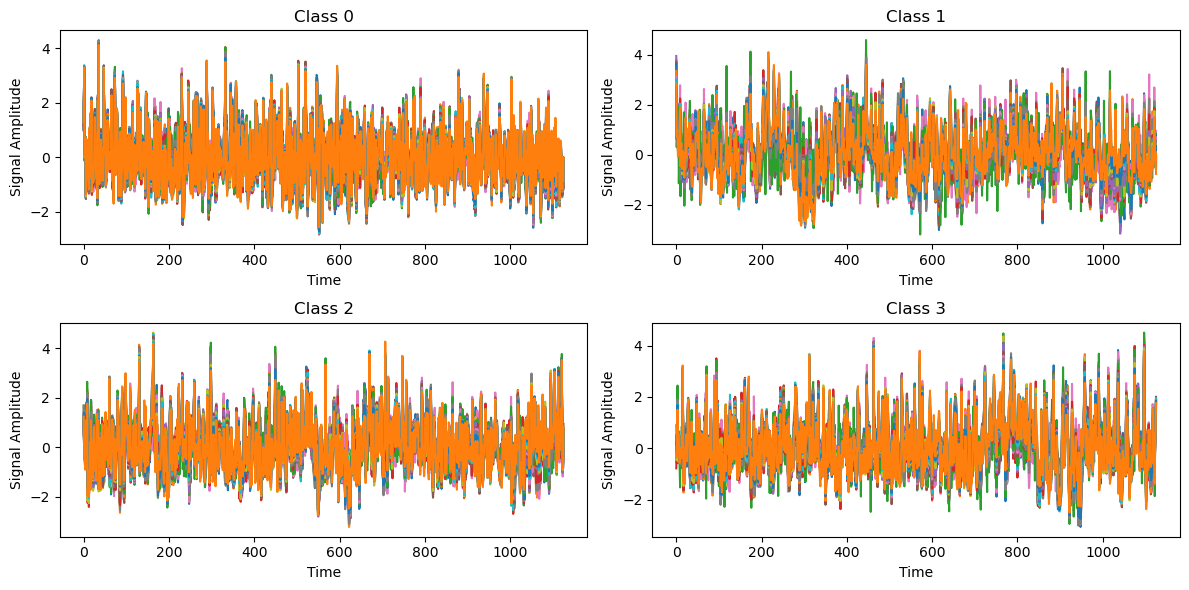

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Define the path to the directory containing the matrix files for new test data
new_test_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epochstest2'

# Initialize lists to store new test data
new_test_data = []

# Iterate through each file in the new test directory
for file in os.listdir(new_test_dir):
    if file.endswith('.npy'):
        # Load matrix data
        matrix_data = np.load(os.path.join(new_test_dir, file))
        # Append data
        new_test_data.append(matrix_data)

# Convert list to array
new_test_data = np.array(new_test_data)

# Standardize new test data
new_test_data = (new_test_data - np.mean(new_test_data, axis=0)) / np.std(new_test_data, axis=0)

# Load the best model
model_path = 'best_model.keras'
model = tf.keras.models.load_model(model_path)

# Predict classes for the new test data
new_y_pred = model.predict(new_test_data)
new_y_pred_classes = np.argmax(new_y_pred, axis=1)

# Plot 1-1 picture of each class Image representation of EEG signals
class_indices = np.unique(new_y_pred_classes)
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Update with your class names

plt.figure(figsize=(12, 6))
sample_indices_per_class = {}
for i in class_indices:
    class_indices = np.where(new_y_pred_classes == i)[0]
    sample_indices_per_class[i] = np.random.choice(class_indices, size=1, replace=False)[0]
    sample_data = new_test_data[sample_indices_per_class[i]]

    # Plot EEG signal example
    plt.subplot(2, 2, i + 1)
    plt.plot(sample_data.T)
    plt.title(class_names[i])
    plt.xlabel('Time')
    plt.ylabel('Signal Amplitude')

plt.tight_layout()
plt.show()


In [18]:
import numpy as np
import os

# Assuming new_y_pred_classes contains the predicted classes for your new test data
new_y_pred_classes = np.array([0, 1, 2, 3, ...])  # Replace with your actual predicted classes

# Define the directory where your new test data is located
new_test_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epochstest2'  # Update with your test data directory

# Save the predicted labels to a .npy file at the same location as the new test data
labels_save_path = os.path.join(new_test_dir, 'predicted_labels.npy')
np.save(labels_save_path, new_y_pred_classes)

print(f"Predicted labels saved successfully to: {labels_save_path}")


Predicted labels saved successfully to: /home/jovyan/BCICIV_2a_gdf/processed_epochstest2/predicted_labels.npy


Total number of files: 287


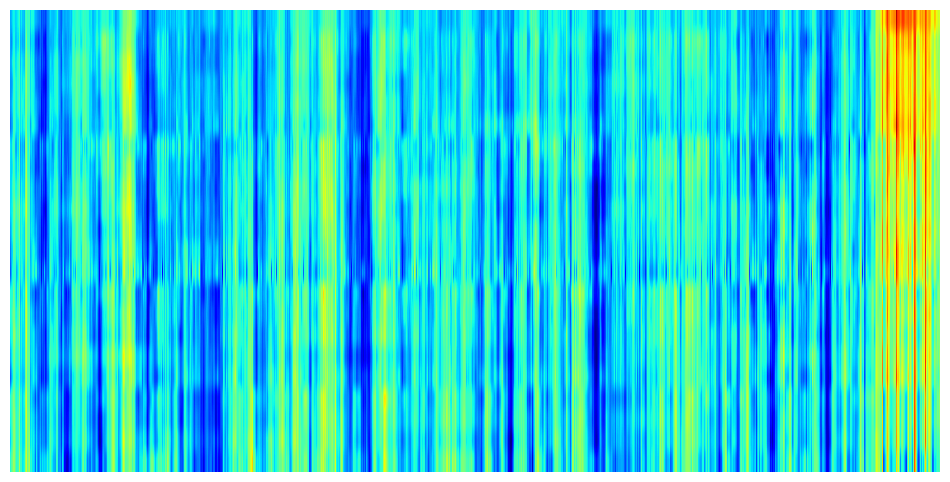

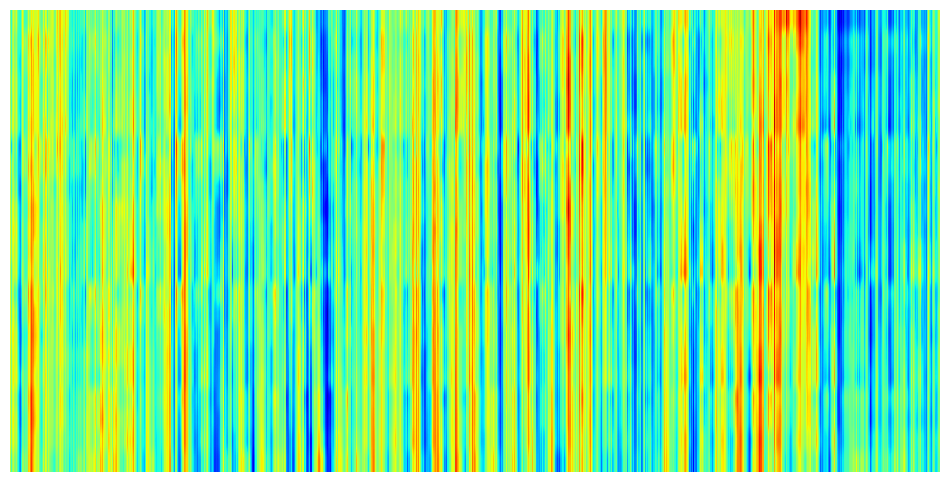

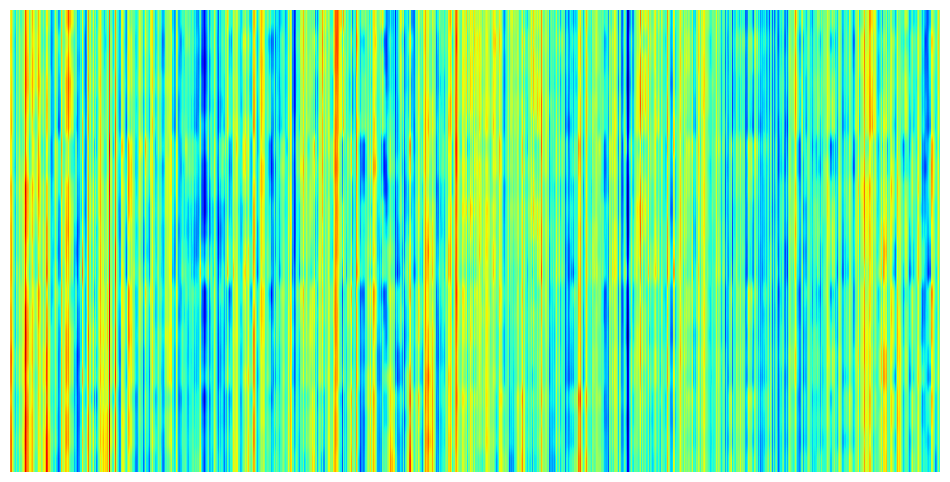

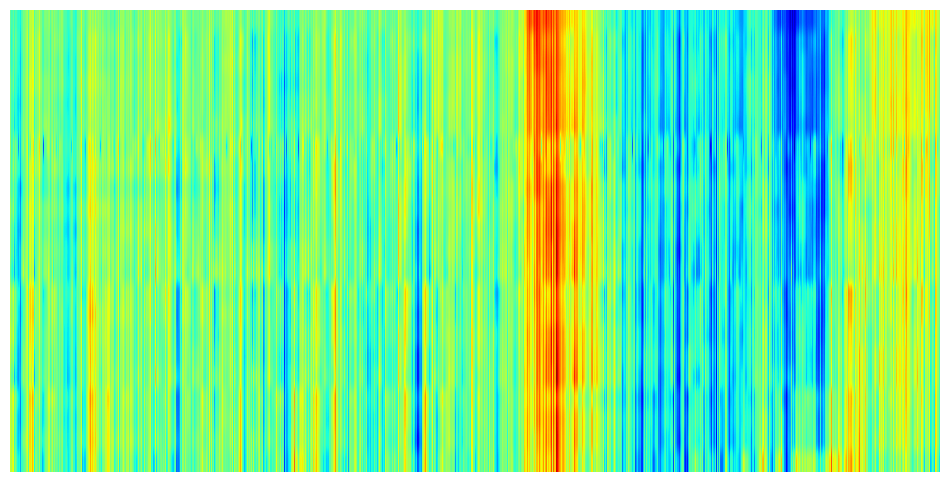

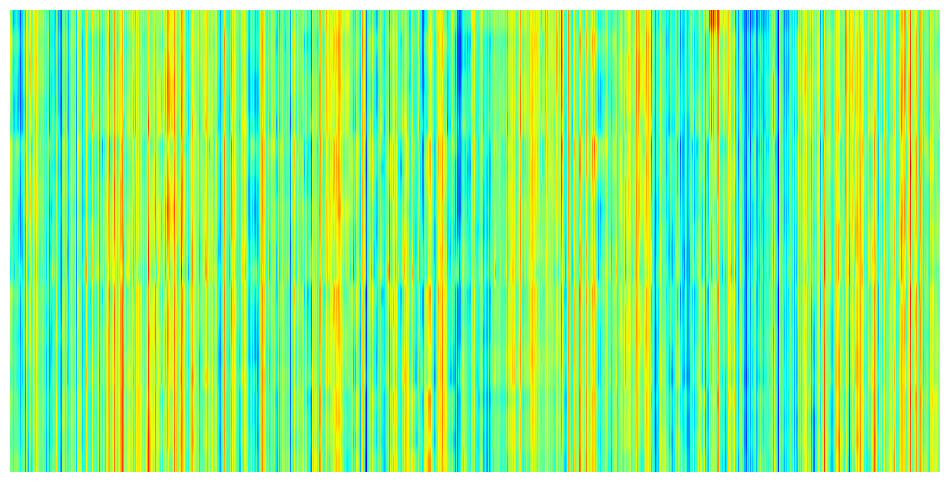

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.2378 - loss: 1.9273 - val_accuracy: 0.2609 - val_loss: 1.3881 - learning_rate: 9.0000e-04
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3995 - loss: 1.1664 - val_accuracy: 0.1957 - val_loss: 1.3894 - learning_rate: 9.0000e-04
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5435 - loss: 1.0578 - val_accuracy: 0.2391 - val_loss: 1.3846 - learning_rate: 9.0000e-04
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6486 - loss: 0.8855 - val_accuracy: 0.3043 - val_loss: 1.3799 - learning_rate: 9.0000e-04
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6939 - loss: 0.8049 - val_accuracy: 0.2826 - val_loss: 1.3790 - learning_rate: 9.0000e-04
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7755 - loss: 0.5672 - val_accuracy: 0.2826 - val_loss: 1.3787 - learning_rate: 9.0000e-04
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8454

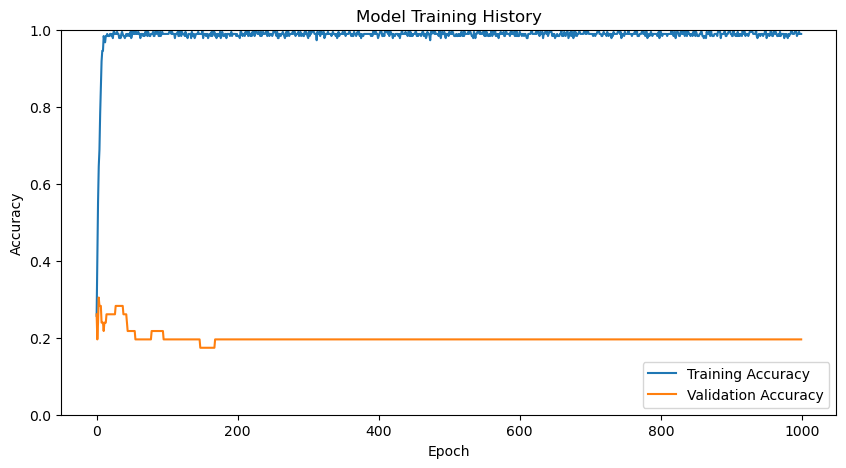

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0xfffd40345bc0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step


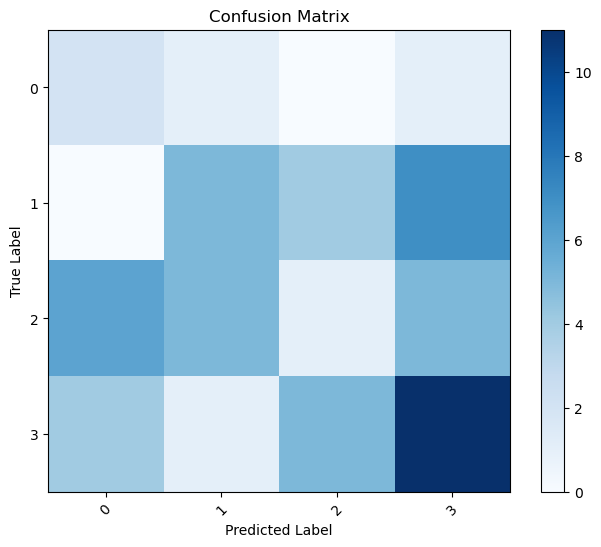

Accuracy: 0.3276
Precision: 0.3217
Recall: 0.3276
F1 Score: 0.3145
Cohen's Kappa: 0.0767


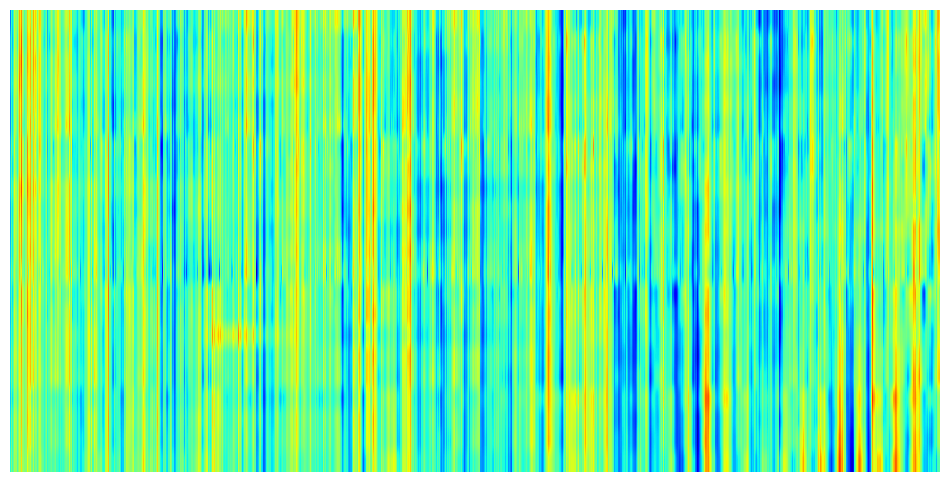

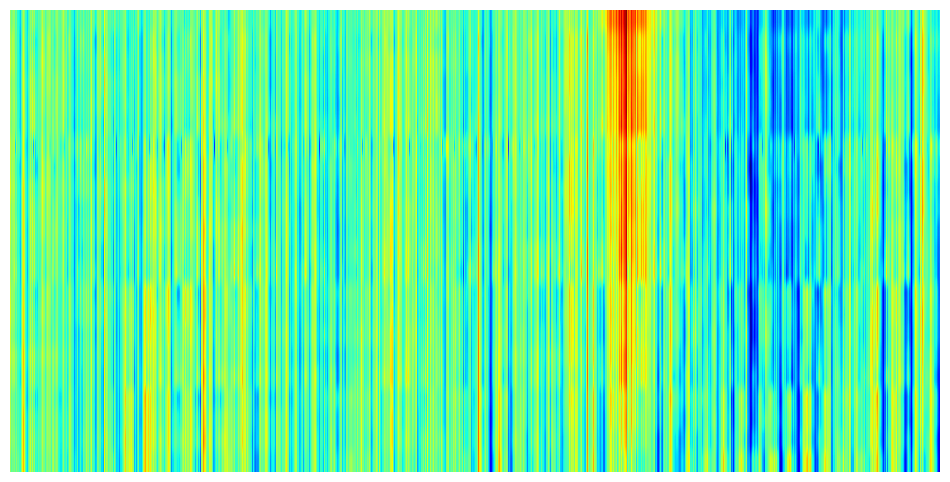

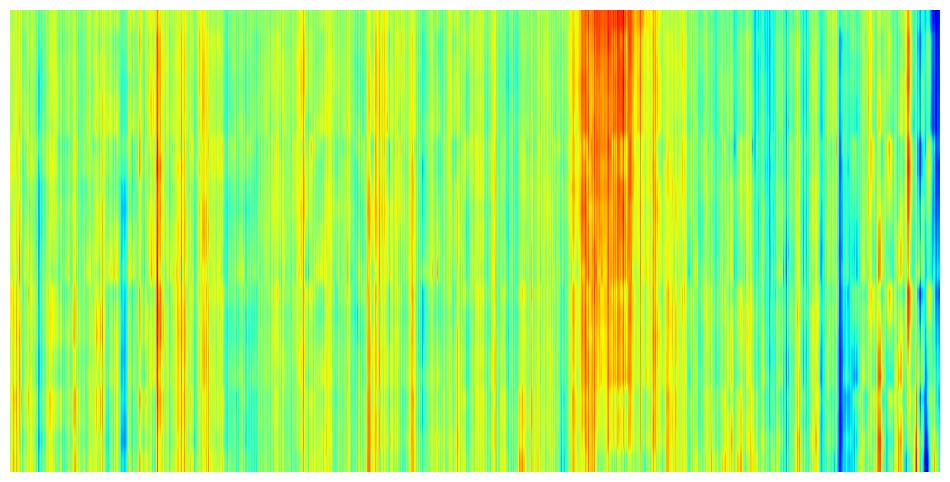

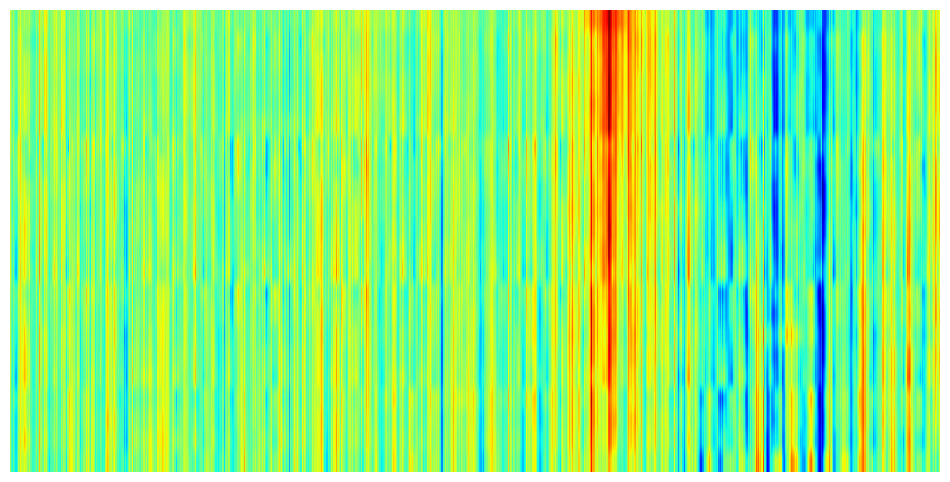

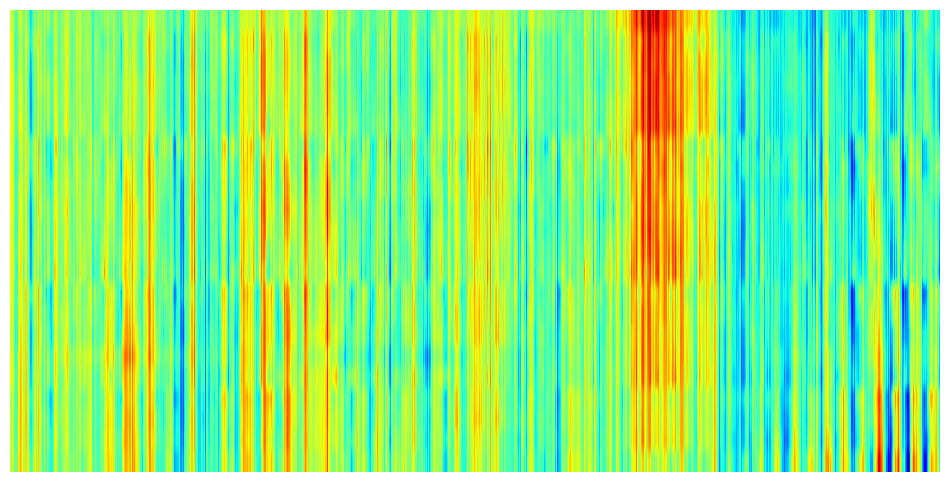

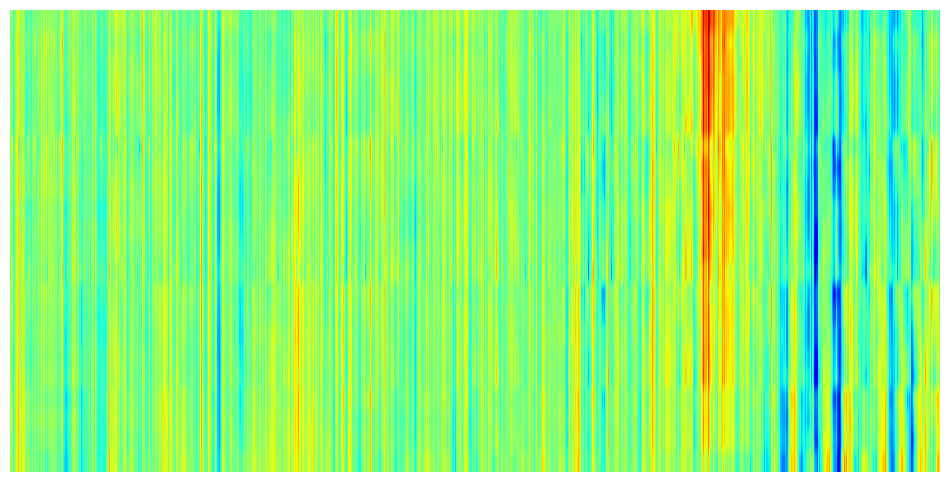

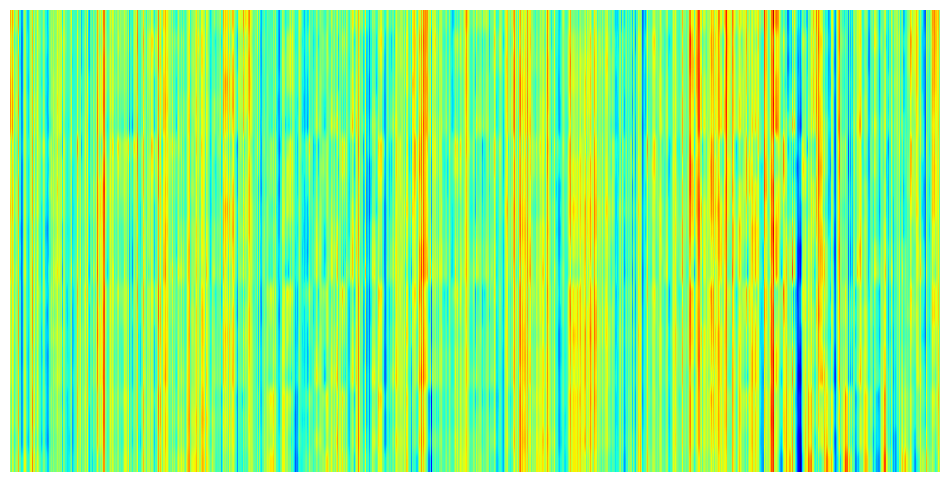

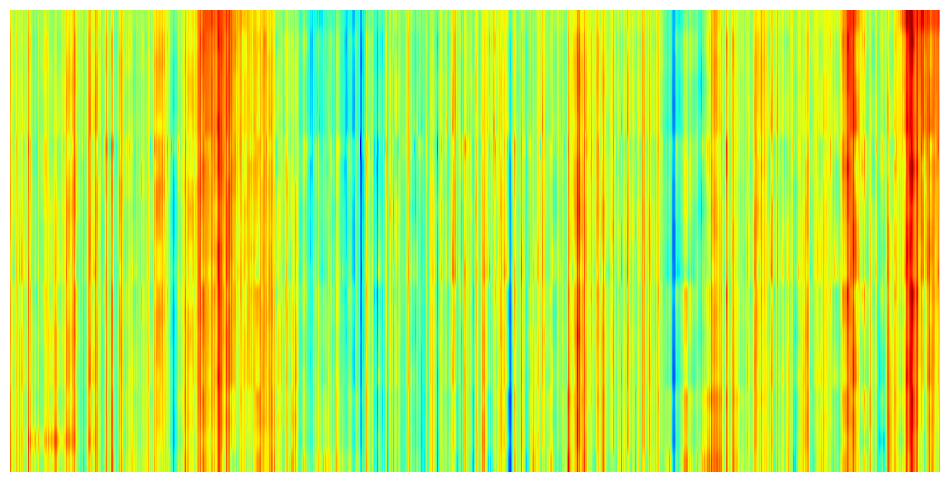

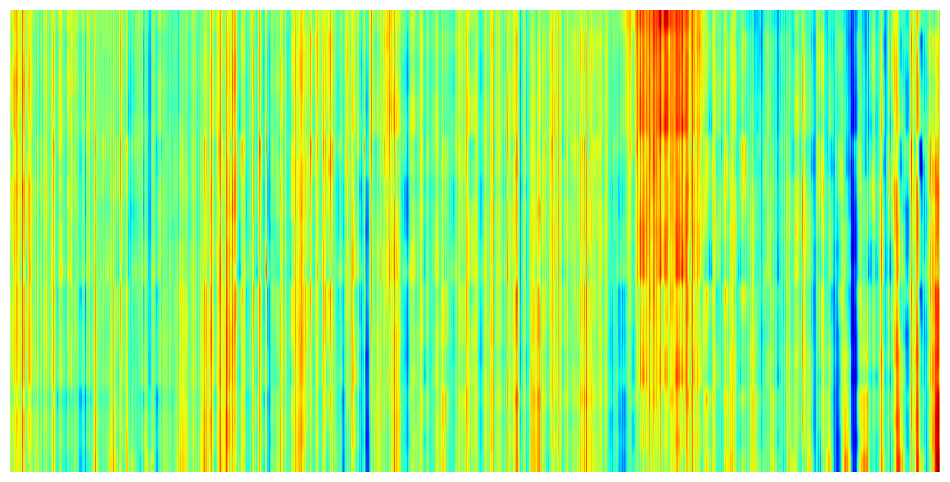

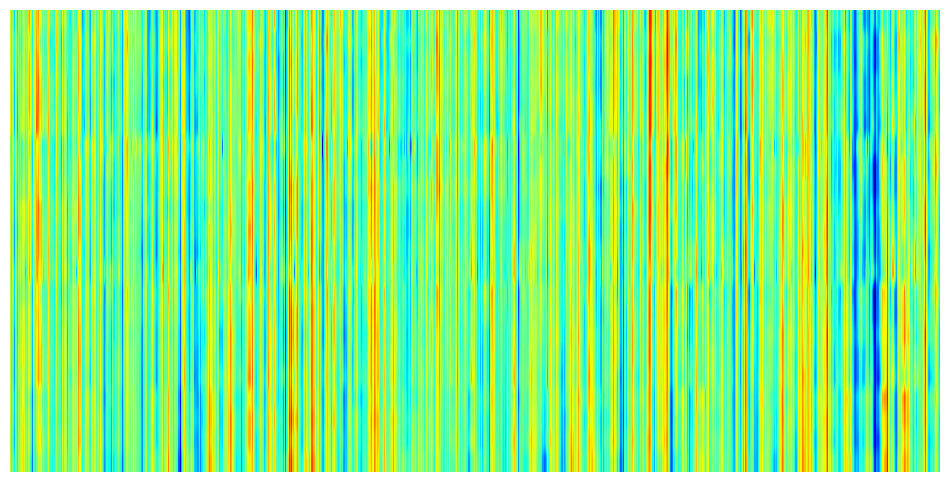

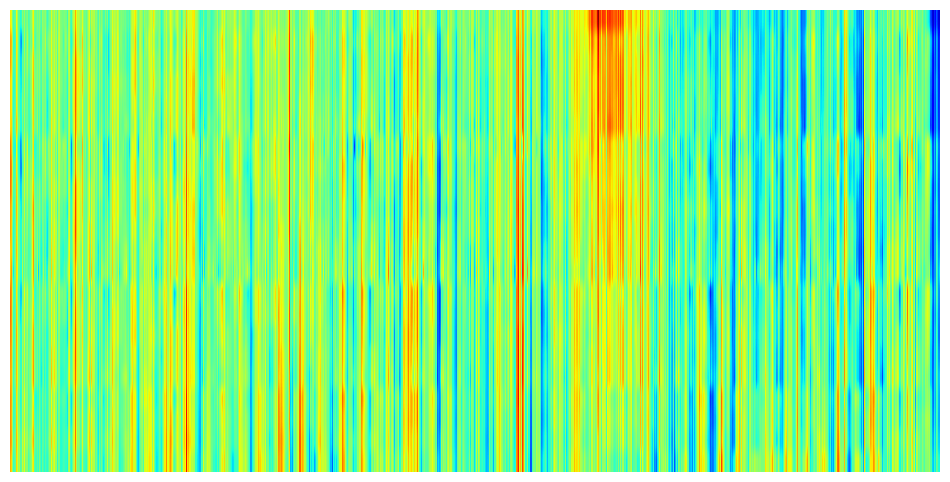

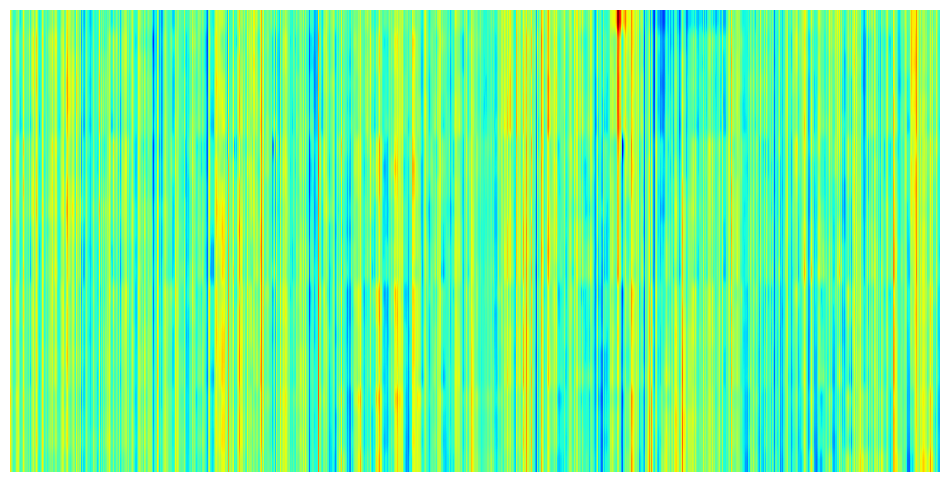

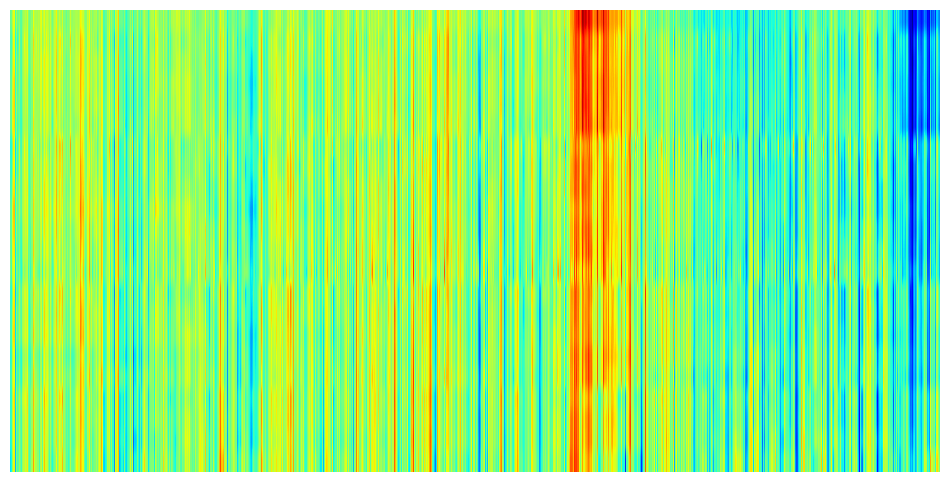

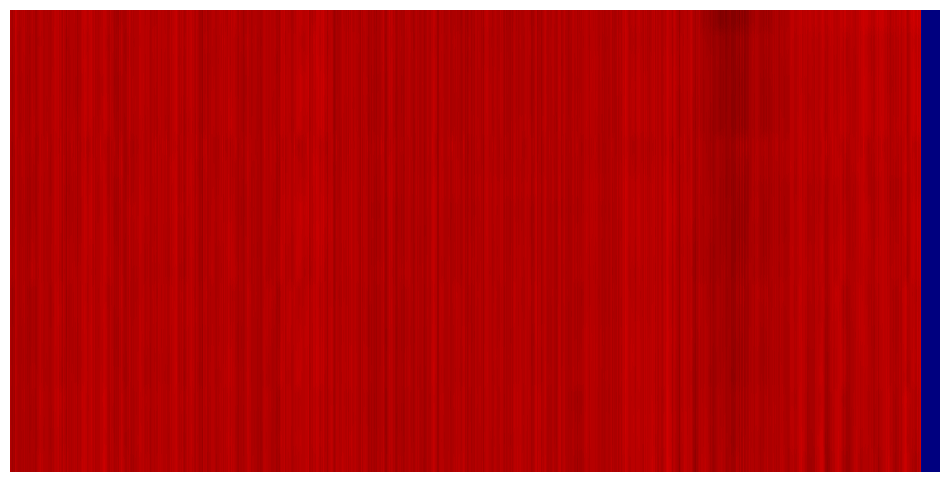

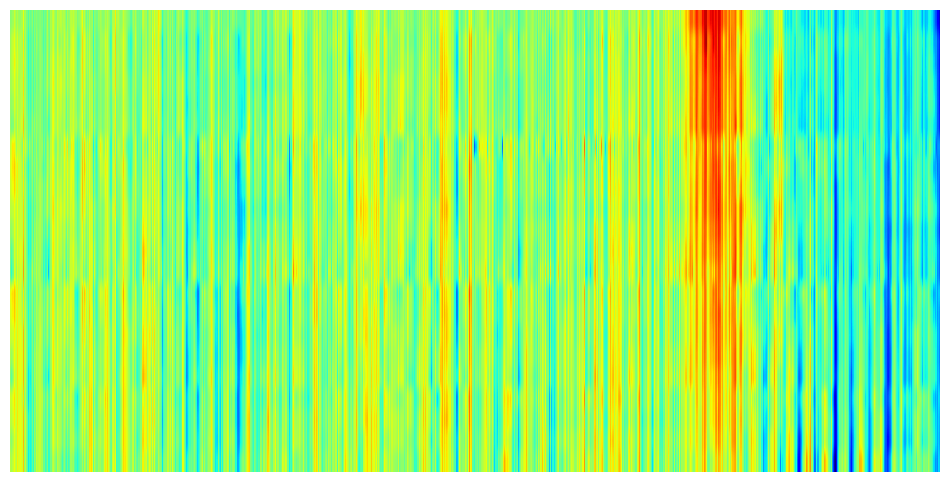

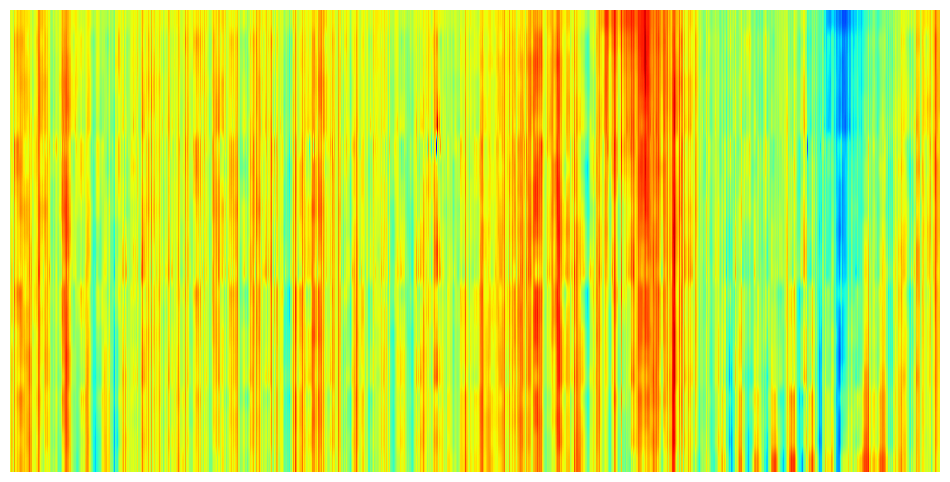

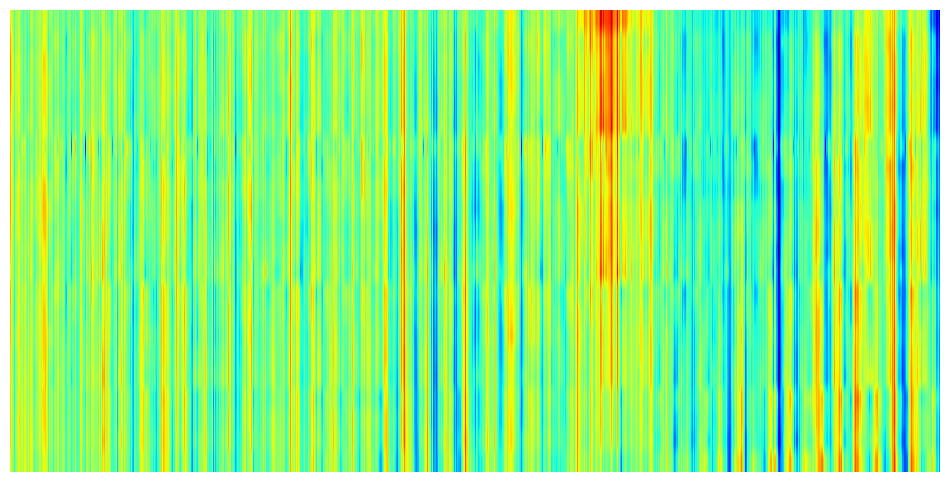

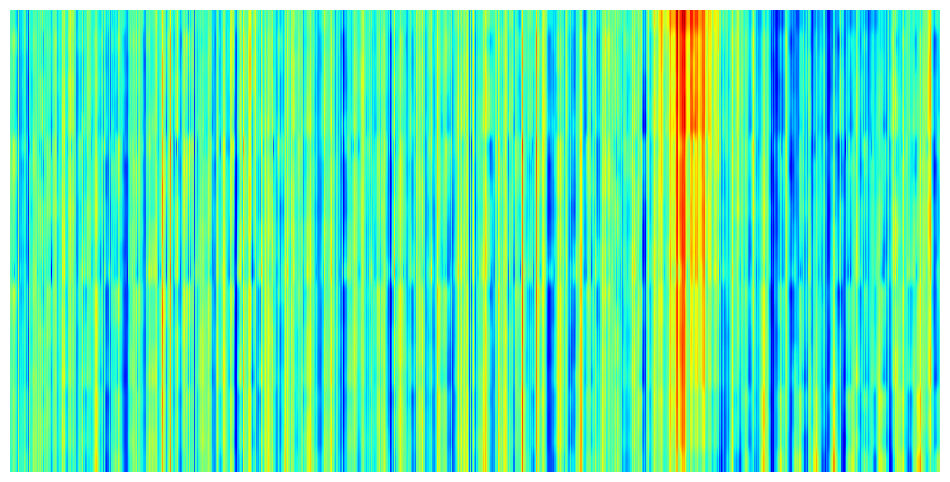

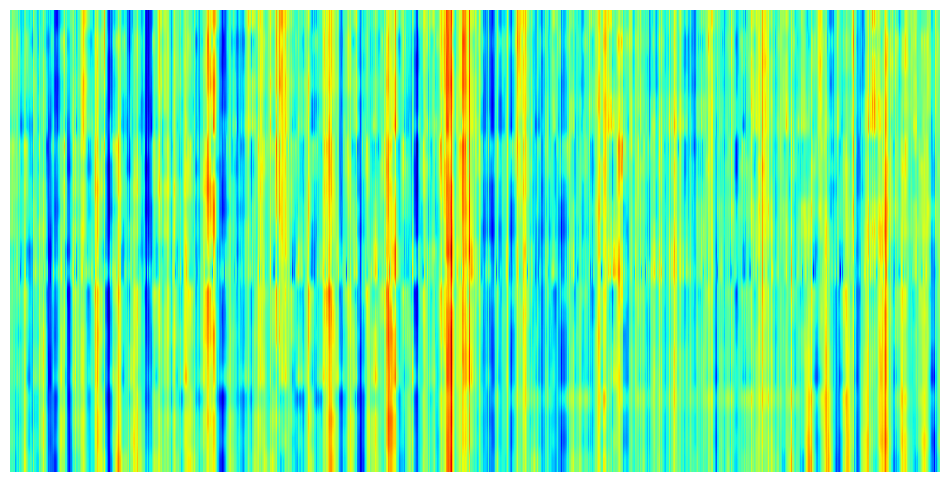

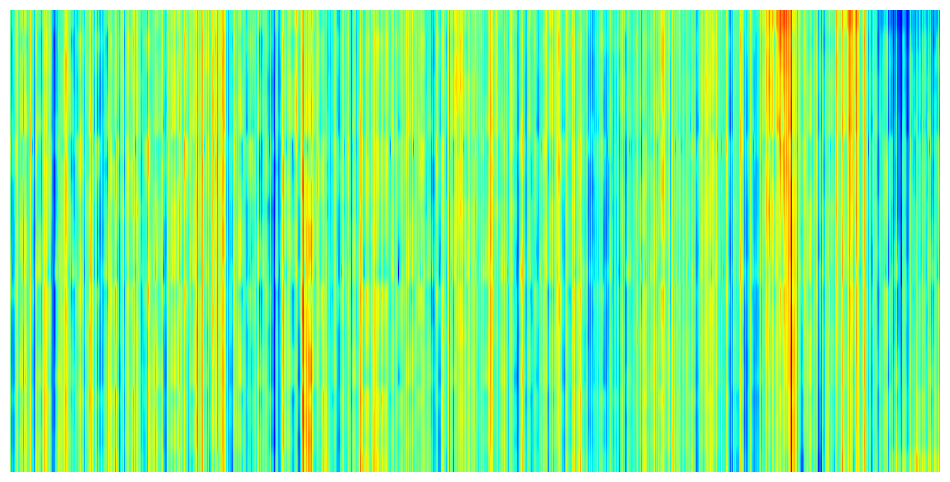

In [13]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the path to the directory containing the matrix files
data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_sub3'

# Initialize lists to store data and labels
data = []
labels = []

# Iterate through each file in the directory
for file in os.listdir(data_dir):
    if file.endswith('.npy'):
        # Extract the class label from the file name
        class_label = int(file.split('_')[-1].split('.')[0])
        # Load matrix data
        matrix_data = np.load(os.path.join(data_dir, file))
        # Append data and labels
        data.append(matrix_data)
        labels.append(class_label)

# Convert lists to arrays
data = np.array(data)
labels = np.array(labels)

# Check that we have exactly 4 unique classes
unique_labels = np.unique(labels)
num_classes = len(unique_labels)
assert num_classes == 4, f"Expected 4 classes, but found {num_classes} classes: {unique_labels}"

# Standardize data
data = (data - np.mean(data, axis=(0, 2), keepdims=True)) / np.std(data, axis=(0, 2), keepdims=True)

# Print total number of files
total_files = len(data)
print("Total number of files:", total_files)

# Plot some file data without labels or axes
num_files_to_plot = 5
for i in range(num_files_to_plot):
    plt.figure(figsize=(12, 6))
    plt.imshow(data[i], aspect='auto', cmap='jet')
    plt.axis('off')  # Remove labels and axes
    plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define hyperparameters
KE = 32
pe = 0.3
F1 = 24
L = 2
KT = 4
FT = 12
D = 2
pt = 0.3

def create_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGnet-like part
    # Temporal Convolution Layer
    x = layers.Conv1D(filters=F1, kernel_size=KE, activation='elu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)

    # Depth-wise Convolution
    x = layers.DepthwiseConv1D(kernel_size=1, depth_multiplier=D, activation='elu', padding='valid')(x)
    x = layers.BatchNormalization()(x)

    # Separable Convolution
    x = layers.SeparableConv1D(filters=F1, kernel_size=16, activation='elu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Average Pooling
    x = layers.AveragePooling1D(pool_size=8, padding='same')(x)
    x = layers.Dropout(pe)(x)

    # TCN part
    for _ in range(L):
        residual = x
        for rate in (1, 2, 4):
            dilated_conv = layers.Conv1D(filters=FT, kernel_size=KT, padding='causal', dilation_rate=rate)(x)
            bn = layers.BatchNormalization()(dilated_conv)
            elu = layers.Activation('elu')(bn)
            dropout = layers.Dropout(pt)(elu)
        # 1x1 Convolution to ensure the addition has the same depth shapes
        residual_conv = layers.Conv1D(filters=FT, kernel_size=1)(residual)
        # Adding the residual connection
        x = layers.Add()([dropout, residual_conv])

    # Concatenation
    x = layers.Concatenate(axis=2)([dropout, x])

    # Flatten and Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='elu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Assuming input_shape is correctly defined as (num_channels, num_time_samples)
input_shape = (X_train.shape[1], X_train.shape[2])

# Create and compile the model
model = create_model(input_shape, num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * np.exp(-0.1))

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_split=0.2, callbacks=[callback])

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Training History')
plt.show()

# Predict the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, tick_marks, rotation=45)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute performance metrics
accuracy = np.mean(y_pred == y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

# Plot individual plots for each class without labels or axes
for class_label in unique_labels:
    class_data = X_train[y_train == class_label]
    num_examples_to_plot = min(len(class_data), 5)
    for i in range(num_examples_to_plot):
        plt.figure(figsize=(12, 6))
        plt.imshow(class_data[i], aspect='auto', cmap='jet')
        plt.axis('off')  # Remove labels and axes
        plt.show()
